Project options

- Credit card fraud detection
- 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing
import warnings
warnings.filterwarnings("ignore")

# Acquire

In [2]:
# reading data from csv stored in local file
df = pd.read_csv('creditcard.csv')

In [3]:
# taking a peek at the data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# looking at the Time column to get an idea of what values are here
df.Time.sample(20)

179553    124131.0
191686    129370.0
62125      50139.0
129491     79108.0
262240    160376.0
135317     81199.0
116669     74383.0
61314      49767.0
209950    137785.0
183583    125868.0
224269    143718.0
62025      50093.0
3906        3487.0
269110    163533.0
80784      58651.0
121120     76078.0
81274      58862.0
268007    163023.0
200764    133567.0
251013    155169.0
Name: Time, dtype: float64

- Time = Number of seconds elapsed between this transaction and the first transaction in the dataset
- so with this definition I think I will need to resample eventually to see a broader picture of what is going on
- do I drop the columns I don't know what the values mean?


In [5]:
df.shape

(284807, 31)

# Prepare

In [6]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

<AxesSubplot:xlabel='Time'>

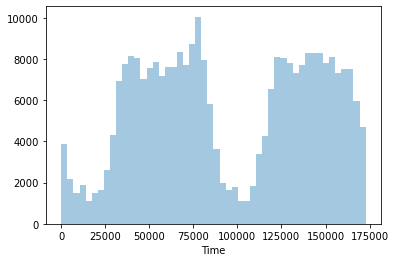

In [7]:
# Plot the histogram using the distplot function
sns.distplot( a=df["Time"], hist=True, kde=False, rug=False )

<AxesSubplot:xlabel='Amount'>

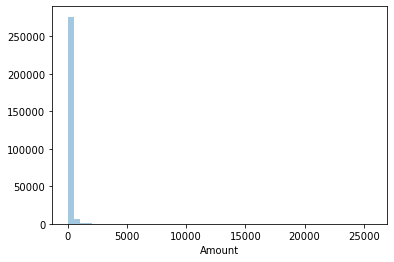

In [8]:
# Plot the histogram using the distplot function
sns.distplot( a=df["Amount"], hist=True, kde=False, rug=False )

<AxesSubplot:xlabel='Class', ylabel='Amount'>

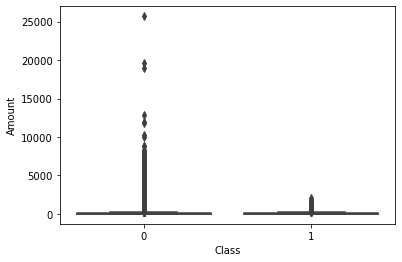

In [9]:
# creating a boxplot to look for outliers in Amount
sns.boxplot( x=df["Class"], y=df["Amount"] )

- consider handling outliers in Amount columnn to see what distribution looks like

In [10]:
# def get_upper_outliers(s, k):
#     '''
#     Given a series and a cutoff value, k, returns the upper outliers for the
#     series.

#     The values returned will be either 0 (if the point is not an outlier), or a
#     number that indicates how far away from the upper bound the observation is.
#     '''
#     q1, q3 = s.quantile([.25, .75])
#     iqr = q3 - q1
#     upper_bound = q3 + k * iqr
#     return s.apply(lambda x: max([x - upper_bound, 0]))

# def add_upper_outlier_columns(df, k):
#     '''
#     Add a column with the suffix _outliers for all the numeric columns
#     in the given dataframe.
#     '''
#     # outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k)
#     #                 for col in df.select_dtypes('number')}
#     # return df.assign(**outlier_cols)

#     for col in df.select_dtypes('number'):
#         df[col + '_outliers'] = get_upper_outliers(df[col], k)

#     return df

# add_upper_outlier_columns(df, k=1.5)

# df.head()

In [11]:
# viewing the details on the outliers in each column
outlier_cols = [col for col in df if col.endswith('_outliers')]
for col in outlier_cols:
    print('~~~\n' + col)
    data = df[col][df[col] > 0]
    print(data.describe())

In [12]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

- Class = 1 for fraudulent transactions, 0 otherwise

In [13]:
import datetime as dt

seconds = df.Time

start = dt.datetime(2013,9,1,0,0) # You need a reference point

time_series = seconds.apply(lambda x: start + pd.Timedelta(seconds=x)).dt.time
time_series.head()

0    00:00:00
1    00:00:00
2    00:00:01
3    00:00:01
4    00:00:02
Name: Time, dtype: object

In [14]:
# can't get this one to work so Im trying spark 
# add time_series as a column to the df
#DataFrame.add(other, axis='columns', level=None, fill_value=None)
#df.add(time_series, axis='columns', level=None, fill_value=None)

In [15]:
# concatenate time_series series into df and replace seconds column
# df.append(time_series, ignore_index=True)

In [16]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
# checking for missing values
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Splitting the dataset into train and test

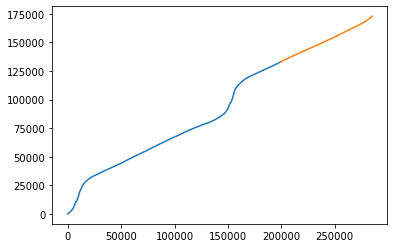

In [18]:
# splitting the dataset with a percentage based method for time 
# series data

train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.Time)
plt.plot(test.index, test.Time)

In [19]:
# the second split
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['Class'])
y_train = train.Class

X_test = test.drop(columns=['Class'])
y_test = test.Class

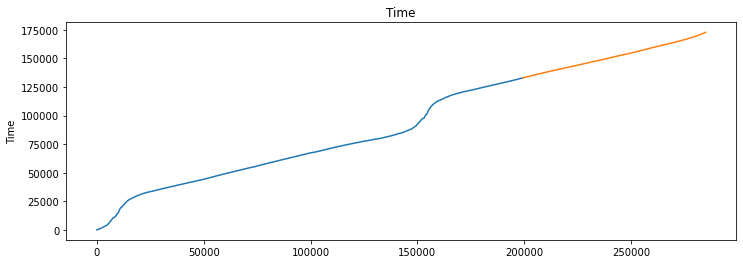

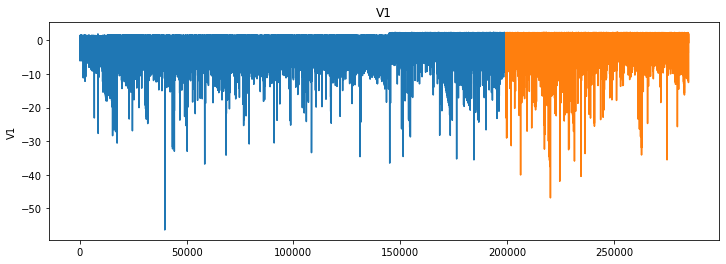

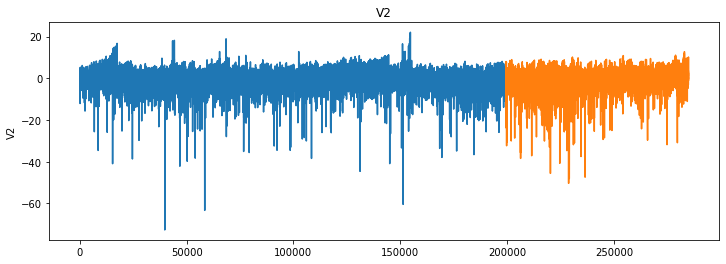

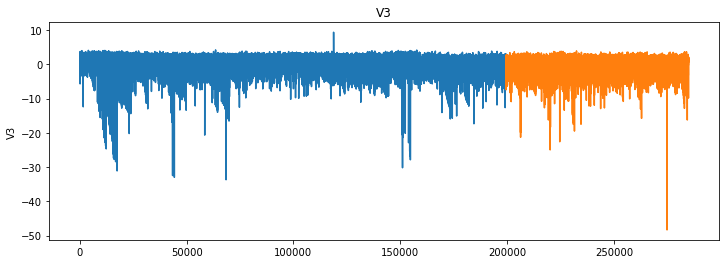

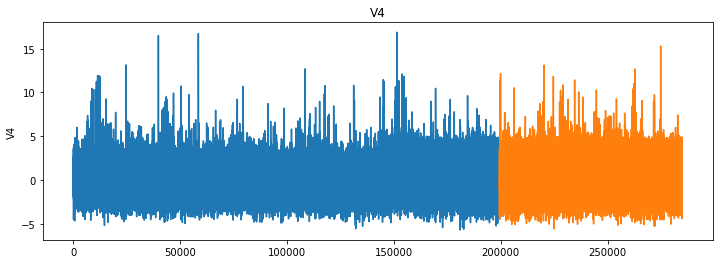

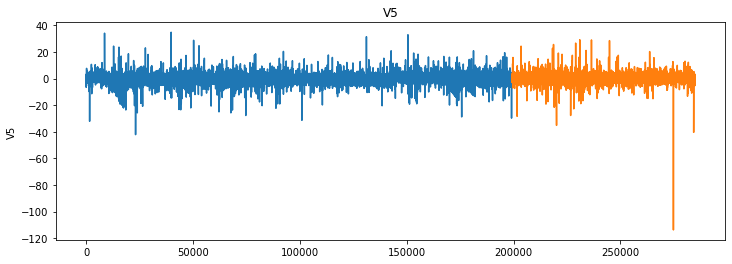

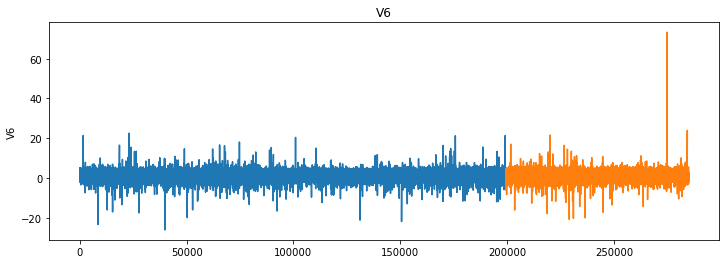

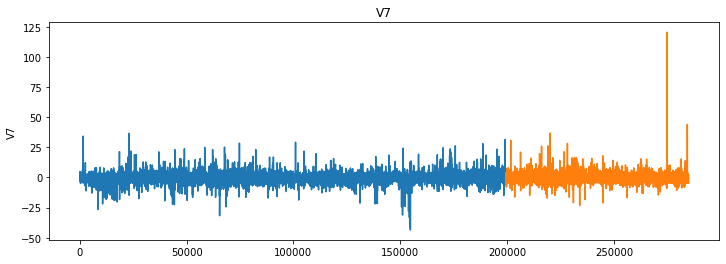

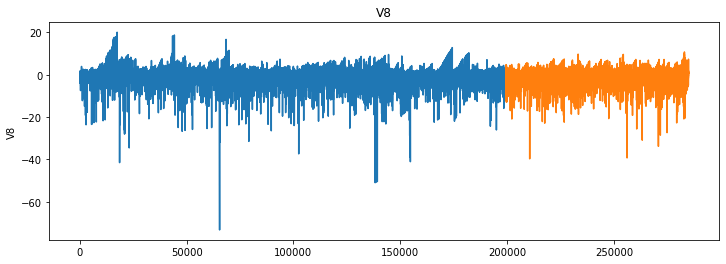

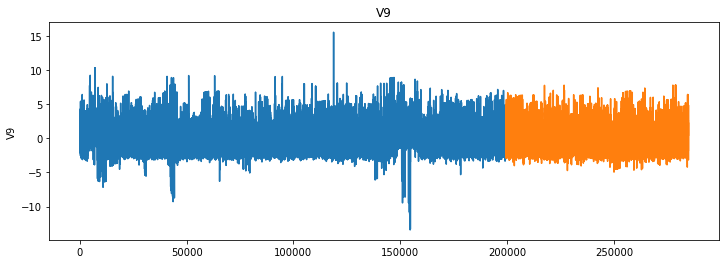

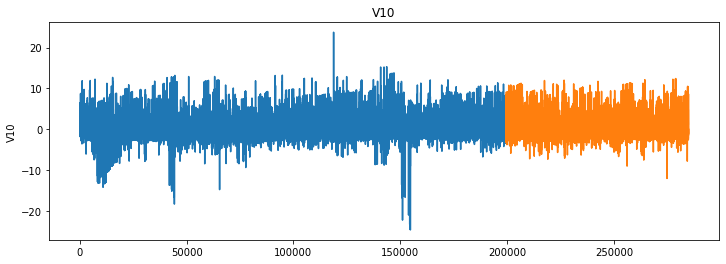

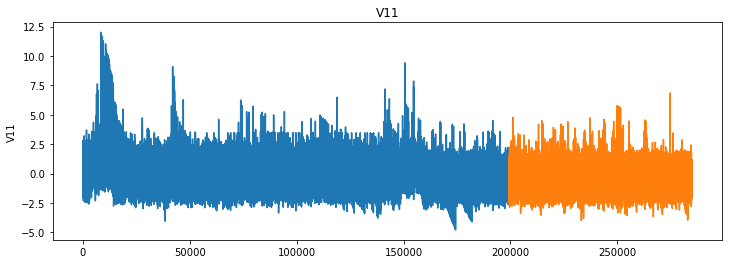

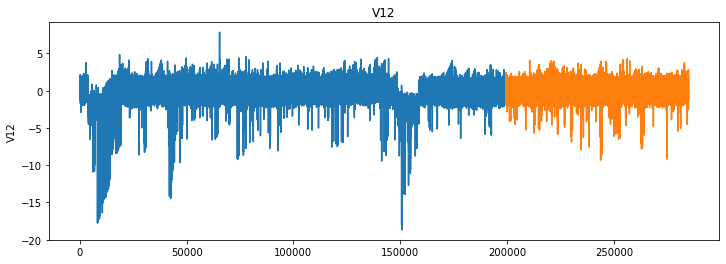

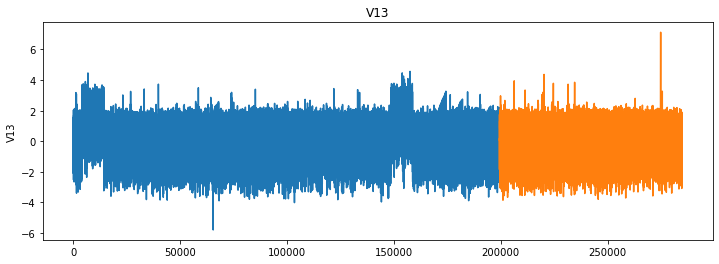

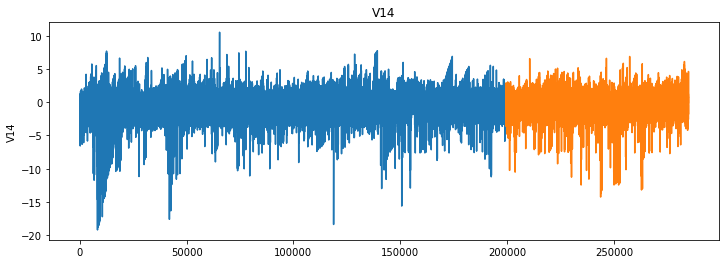

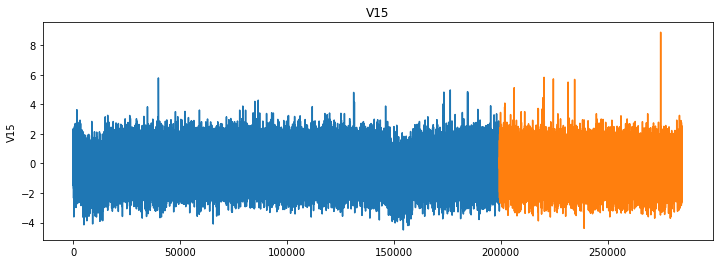

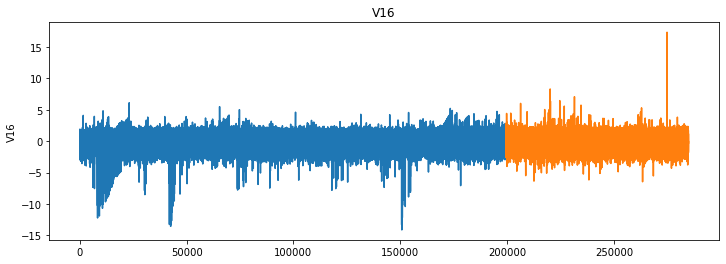

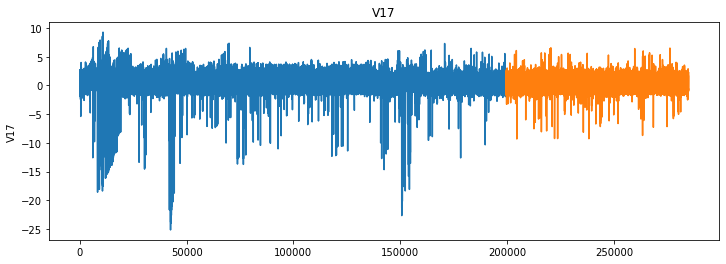

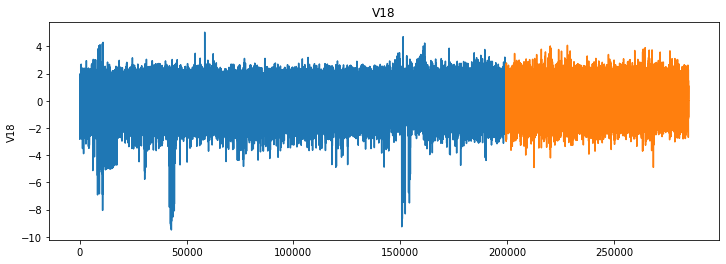

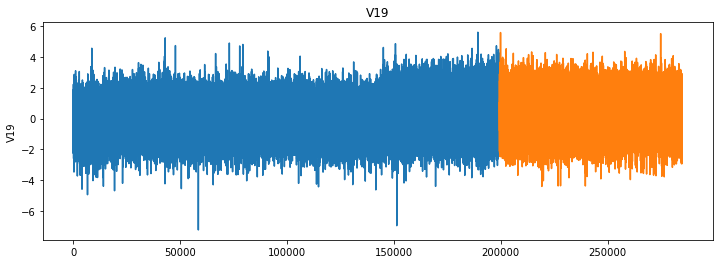

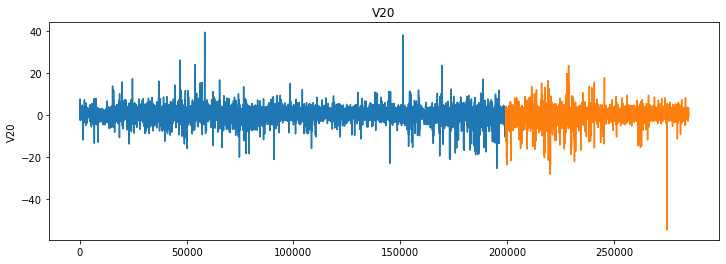

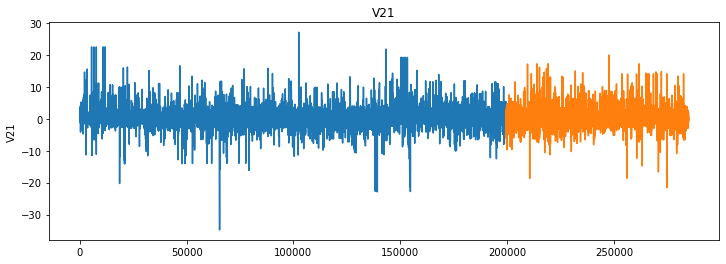

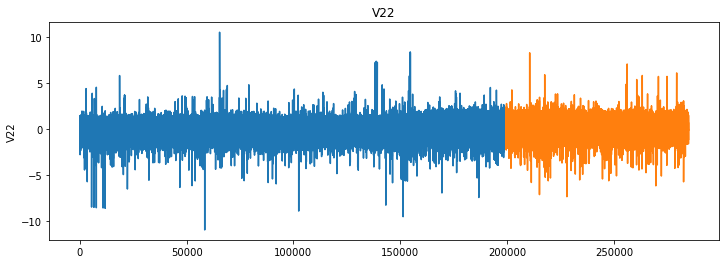

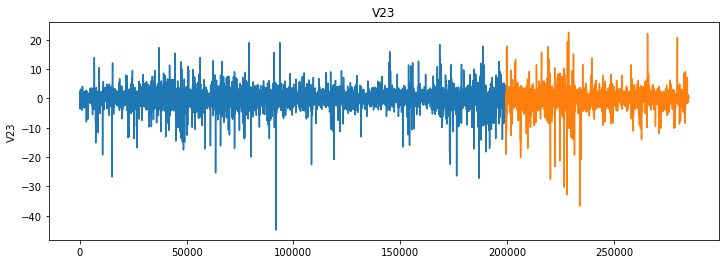

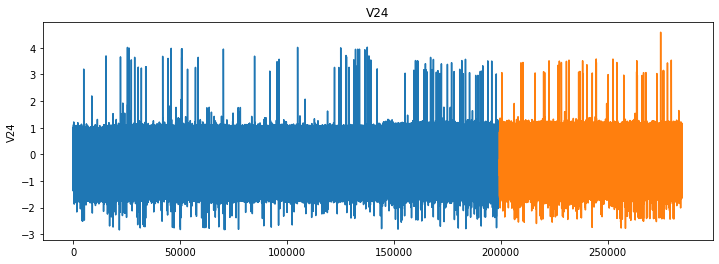

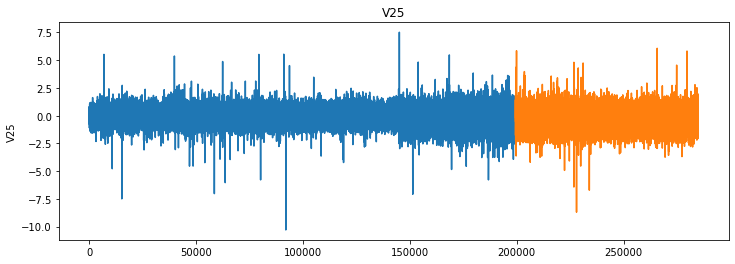

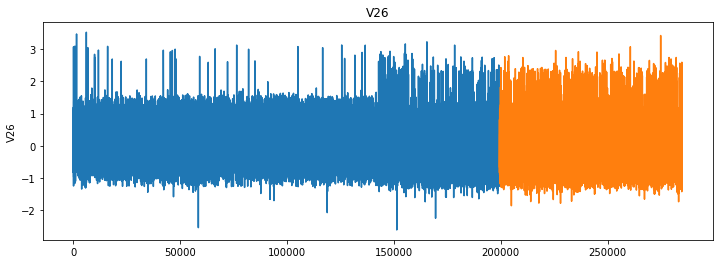

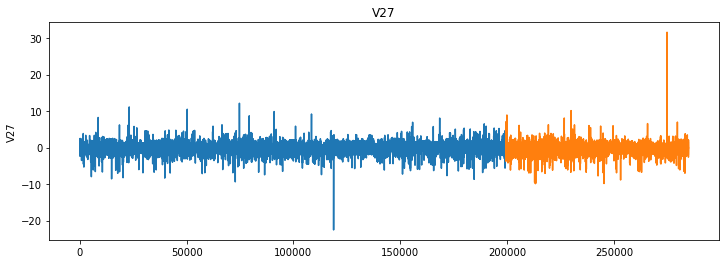

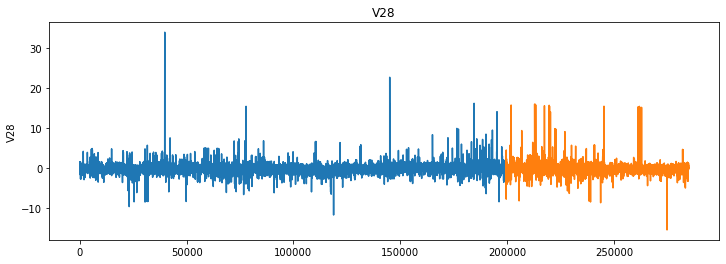

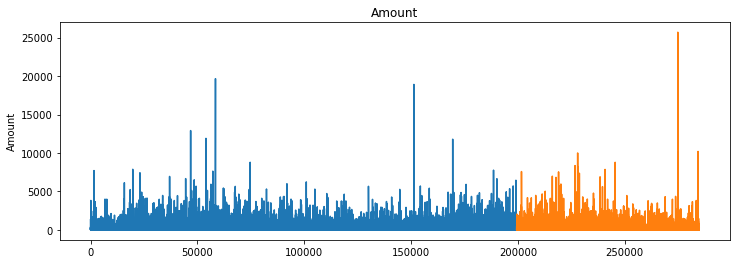

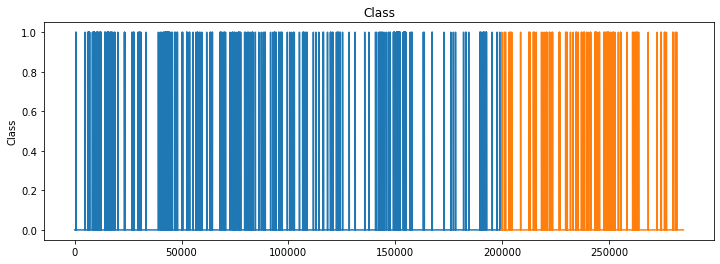

In [20]:
# taking a look at the train test data split
for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

### Scaling the dataset for modeling

Text(0.5, 1.0, 'Scaled')

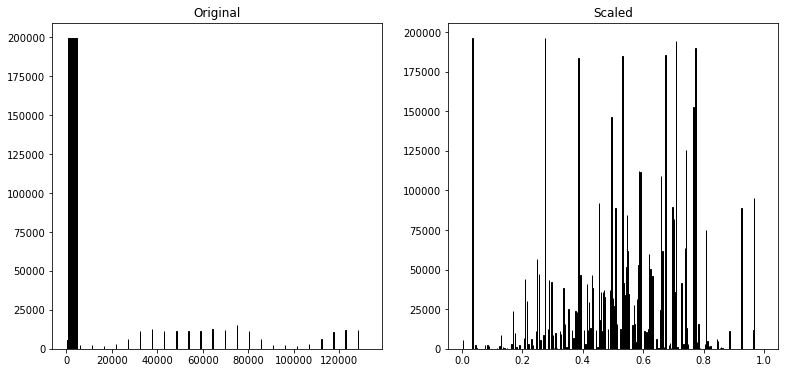

In [21]:
# using the MinMax Scaler scale the dataset
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

In [22]:
# create a new spark session
import pyspark

spark = pyspark.sql.SparkSession.builder.getOrCreate()

# convert the pandas dataframe to a spark dataframe
df = spark.createDataFrame(df)
df

df.show(5)

+----+------------------+-------------------+----------------+------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+------+-----+
|Time|                V1|                 V2|              V3|                V4|                 V5|                 V6|                 V7|                V8|                V9|                V10|               V11|               V12|               V13|               V14|               V15|               V16|               V17|                V18|               V19|                V20|                V21|               V22|          

In [32]:
df.describe().show(2)

+-------+-----------------+--------------------+--------------------+------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------+--------------------+
|summary|             Time|                  V1|                  V2|    V3|                  V4|                  V5|                  V6|                  V7|                  V8|                  V9|                 V10|                 V11|                 V12|                 V13|                 V14|                 V15|                 V16|          

In [35]:
# choosing to look at just three features for a moment
df.select(df.Time, df.Amount, df.Class).show(10)

+----+------+-----+
|Time|Amount|Class|
+----+------+-----+
| 0.0|149.62|    0|
| 0.0|  2.69|    0|
| 1.0|378.66|    0|
| 1.0| 123.5|    0|
| 2.0| 69.99|    0|
| 2.0|  3.67|    0|
| 4.0|  4.99|    0|
| 7.0|  40.8|    0|
| 7.0|  93.2|    0|
| 9.0|  3.68|    0|
+----+------+-----+
only showing top 10 rows



In [39]:
# avg_column = (col("hwy") + col("cty")) / 2

# mpg.select(
#     col("hwy").alias("highway_mileage"),
#     mpg.cty.alias("city_mileage"),
#     avg_column.alias("avg_mileage"),
# ).show(5)

time_series1 = time_series

df.select(
    col(time_series1).alias("time"),
    df.Amount.alias("Amount"),
    df.Class,
).show(5)

TypeError: 'str' object is not callable

### Prepare Takeaways
- Time is has a bimodal distribution
- I investigated the outliers in each column and for this MVP run through I will do a version with outliers included for this draft and then do a version with outliers removed 
- turned df into datetime for time series analysis
- no nulls to deal with
- Split dataset into train and test by percentage 
- Data was scaled using the MinMax Scaler
- need to deal with the imbalanced data in target

# Explore

In [23]:
# attempting to write a loop to look at the plot for each column

<AxesSubplot:>

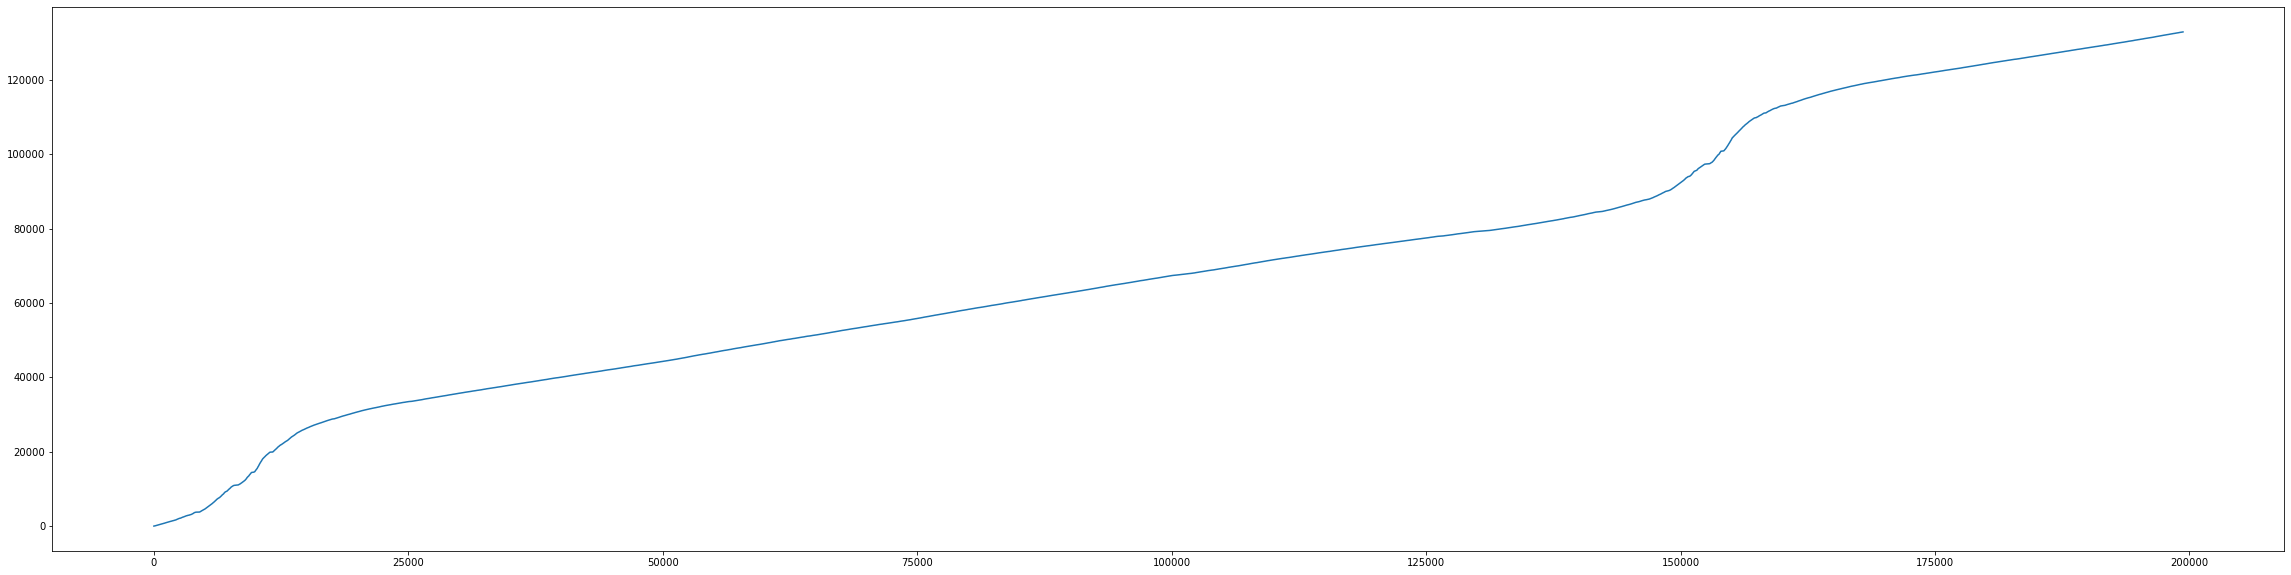

In [24]:
train["Time"].plot(figsize = (40,10))

In [25]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


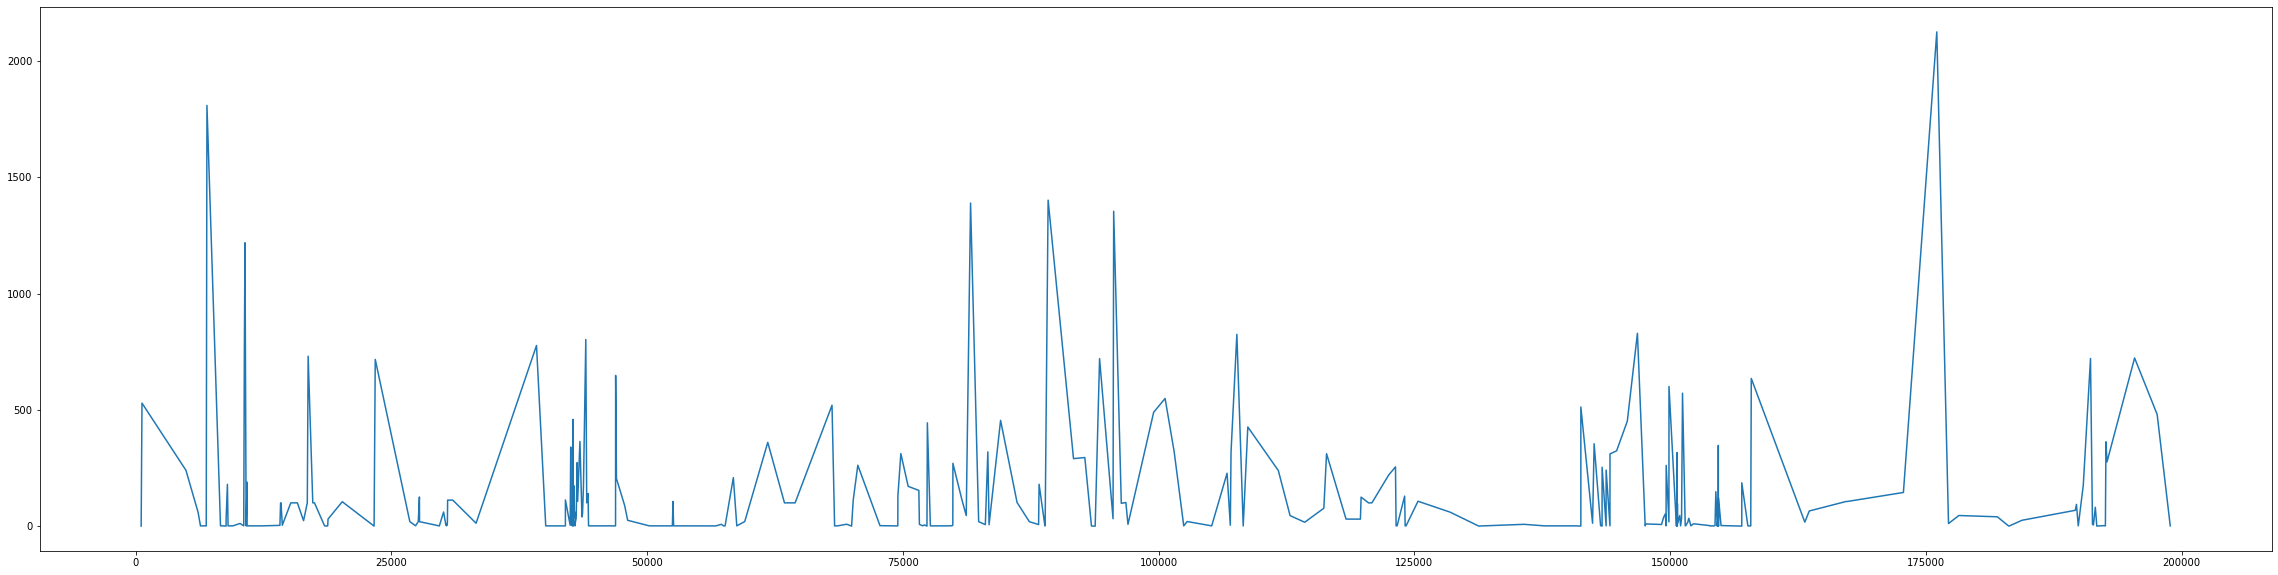

In [26]:
# fraud
train["Amount"][train["Class"] == 1].plot(figsize = (40,10))
plt.show()

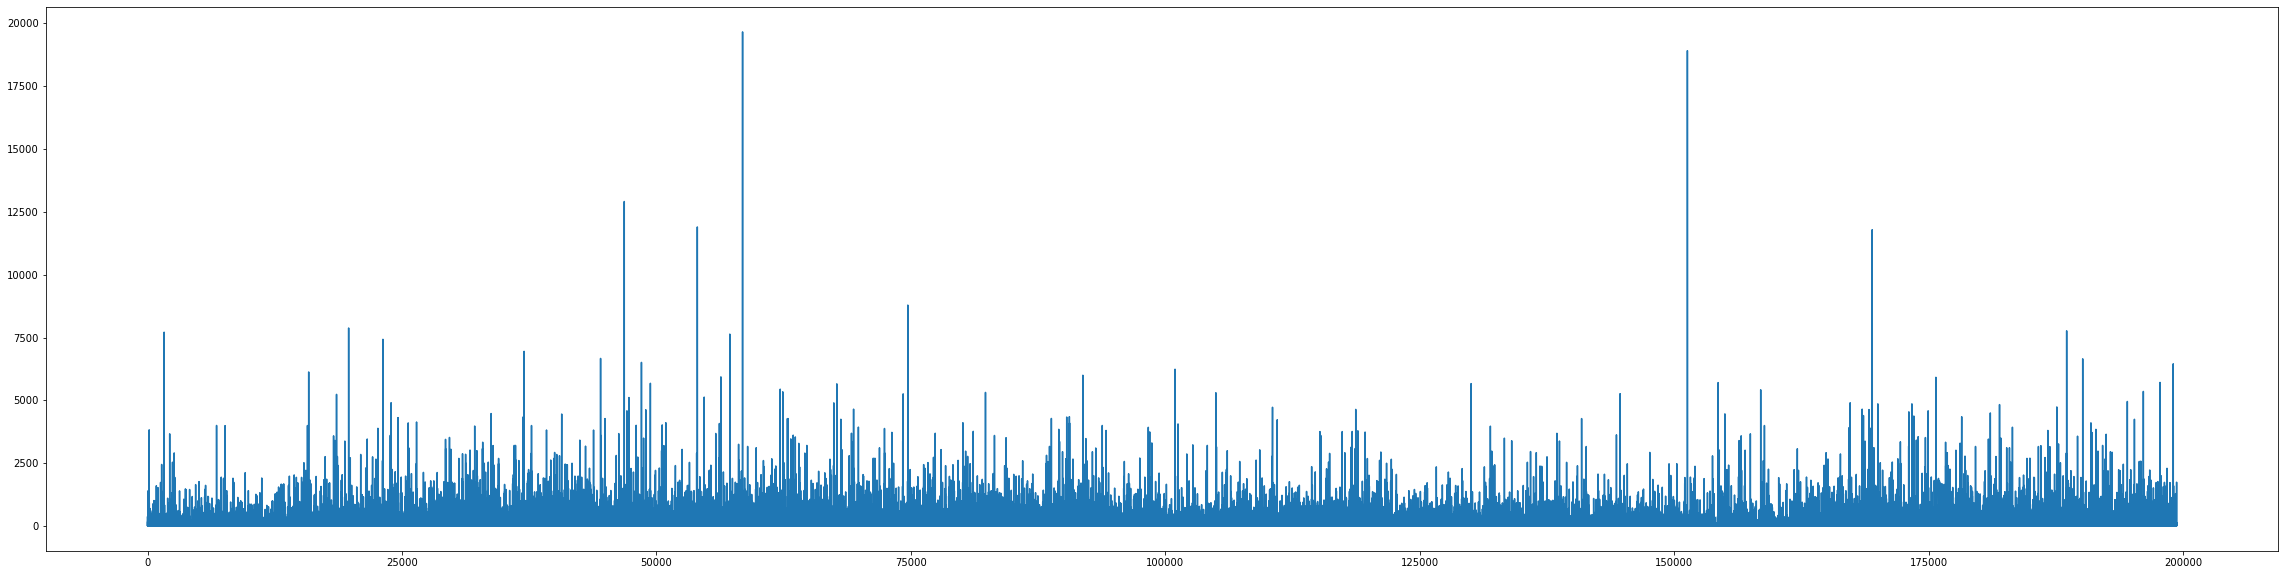

In [27]:
# legitimate transaction
train["Amount"][train["Class"] == 0].plot(figsize = (40,10))
plt.show()

### The plan
- looks like some resampling should be done to get a broader picture
- let's create some visuals in Tableau to expand our options
- hone in on which are the key drivers
  - stats tests
  - feature elimination methods
  - use visuals to guide this exploration
 

# Modeling

In [28]:
# evaluation function to compute rmse

def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [29]:
# go back to modeling section of time series
#

Suggestions:
    For starters, I recommend you try variants of the following.1. Aggregate the usage data by hours/days. 2. From your training data, overlay plots of these time-series to see patterns within the two groups. 3. Explore various time-series/regression models that fit your data well. 4. Use the model coefficients as features for your classifier. 
    
Something I learned about time series
    That the train data too far from test will not predict well so I should use the train data to predict on short increments in comparison to the entire time, in my case 2 days so I might try to predict 2 hours out